# Нейросетевой фреймворк для машинного обучения

## Краткое описание способностей фреймворка

#### 1. DataSetLoader 🗂️
**Назначение:** Работа с данными

| Метод                | Параметры               | Возвращает | Описание                                                                 |
|-----------------------|-------------------------|------------|-------------------------------------------------------------------------|
| `__init__`            | Название датасета       | -          | Автоматическая загрузка iris/mnist/diabetes                             |
| `load_dataset`        | Название датасета       | -          | Загрузка данных в память                                                |
| `get_stats`           | -                       | Словарь    | Возвращает средние значения и стандартные отклонения                    |
| `head`/`tail`        | Количество образцов     | Кортеж     | Первые/последние n примеров данных                                      |
| `info_small`          | -                       | -          | Краткая сводка: размерности и пример данных                             |
| `info_full`           | -                       | -          | Полная статистика с распределением меток и описанием признаков          |
| `shuffle`             | -                       | -          | Перемешивание данных с сохранением соответствия данных и меток          |
| `batch`               | Размер батча            | Генератор  | Итеративная выдача данных порциями                                      |
| `map`                 | Функция преобразования  | -          | Применение функции ко всем данным                                       |
| `filter`              | Функция-фильтр          | -          | Удаление образцов не удовлетворяющих условию                           |
| `split`               | Размер тестовой выборки | Кортеж     | Разделение на train/test                                                |
| `standard_scaler`     | -                       | -          | Нормализация данных по z-оценке                                         |

### 2. ActivationFunction ⚡
**Реализованные функции:**

```python
# ReLU
forward(x) = max(0, x) 
backward(x) = 1 если x > 0, иначе 0

# Sigmoid
forward(x) = 1 / (1 + e^(-x))
backward(x) = σ(x) * (1 - σ(x))

# Tanh
forward(x) = (e^x - e^(-x)) / (e^x + e^(-x))
backward(x) = 1 - tanh²(x)

# LeakyReLU
forward(x) = x (x > 0), 0.01x (x <= 0)
backward(x) = 1 (x > 0), 0.01 (x <= 0)
```

### 3. Optimizer 🎯
**Доступные алгоритмы:**

| Оптимизатор    | Параметры                          | Формула обновления                     |
|---------------|-----------------------------------|----------------------------------------|
| SGD           | `learning_rate`                  | `w = w - η*∇`                          |
| MomentumSGD    | `learning_rate`, `momentum`       | `v = γ*v + η*∇`, `w = w - v`           |
| RMSprop        | `learning_rate`, `decay_rate`     | `E[g²] = ρE[g²] + (1-ρ)g²`, `w = w - η*g/√(E[g²]+ε)` |
| Adam           | `learning_rate`, `beta1`, `beta2` | Комбинация Momentum и RMSprop с bias correction |

### 4. Layer 🧱
**Архитектура:**
```python
class Layer:
    def __init__(input_size, output_size, activation):
        self.weights = инициализация xavier
        self.bias = нулевой вектор
    
    # Прямой проход
    def forward(inputs) → outputs
    
    # Обратное распространение
    def backward(grad_output) → grad_input
```

### 5. NeuralNetwork 🧠
**Рабочий цикл:**
1. Инициализация сети с оптимизатором
```python
model = NeuralNetwork(Optimizer.Adam(lr=0.001))
```
2. Добавление слоев
```python
model.add_layer(Layer(4, 10, ActivationFunction.ReLU))
model.add_layer(Layer(10, 3, ActivationFunction.Softmax))
```
3. Обучение
```python
model.fit(X_train, y_train, epochs=100)
```
4. Предсказание
```python
predictions = model.predict(X_test)
```

## Import Libraries

In [53]:
from framework import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Задача колассификации цветков Iris на Framefork


### Загрузка датасета и отбор основной информации

In [54]:
loader = DataSetLoader('iris')

In [55]:
# Список датасетов
loader.get_available_datasets()

['iris', 'mnist', 'diabetes']

In [56]:
# Первые три записи датасета
loader.head()

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]]),
 array([0, 0, 0]))

In [57]:
# Небольшой отчет о датасете
loader.info_small()

Текущий датасет: iris
Размерность: (150, 4)
Метки: (150,)
Пример данных: (array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]]), array([0, 0, 0]))


In [58]:
# Полный отчет о DataSet
loader.info_full()

Текущий датасет: iris
Размерность: (150, 4)
Метки: (150,)
Пример данных: (array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]]), array([0, 0, 0]), array([[6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]]), array([2, 2, 2]))
Статистика: 
                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000
Количество меток: 
0    50
1    50
2    50
Name: count, dtype: int64
Среднее значение признаков: 
[5.84333333 3.05733333 3.758      1.19933333]
Стандартное отклонение признаков: 
[0.82530129 0.43441097 1.75940407 

In [59]:
# Подготовка данных
loader.standard_scaler()
loader.shuffle()

In [60]:
# Метки до преобразования
loader.labels[:3]

array([1, 0, 2])

In [61]:
# OneHot Преобразование меток
def one_hot_wrapper(data):
    global loader
    # Получаем метки и конвертируем в one-hot
    labels = loader.labels.astype(int)
    one_hot = np.eye(3)[labels]
    # Обновляем метки в загрузчике
    loader.labels = one_hot
    return data  # Возвращаем исходные данные без изменений

loader.map(one_hot_wrapper)
loader.labels[:3]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [62]:
# Разделение на Train и Test
train_set, test_set = loader.split(test_size=0.2)

In [63]:
train_set

(array([[-4.16009689e-01, -1.51316008e+00, -3.29657076e-02,
         -2.62386821e-01],
        [ 4.32165405e-01,  7.88807586e-01,  9.33270550e-01,
          1.44883158e+00],
        [ 7.95669016e-01,  3.28414053e-01,  7.62758269e-01,
          1.05393502e+00],
        [ 1.89829664e-01, -1.97355361e+00,  1.37546573e-01,
         -2.62386821e-01],
        [ 1.89829664e-01, -1.97355361e+00,  7.05920842e-01,
          3.95774101e-01],
        [-9.00681170e-01,  1.70959465e+00, -1.22655167e+00,
         -1.31544430e+00],
        [-4.16009689e-01,  1.01900435e+00, -1.39706395e+00,
         -1.31544430e+00],
        [ 5.53333275e-01,  5.58610819e-01,  1.27429511e+00,
          1.71209594e+00],
        [-1.50652052e+00,  1.24920112e+00, -1.56757623e+00,
         -1.31544430e+00],
        [-5.25060772e-02, -1.05276654e+00,  1.37546573e-01,
          8.77547895e-04],
        [ 7.95669016e-01, -5.92373012e-01,  4.78571135e-01,
          3.95774101e-01],
        [ 2.24968346e+00, -5.92373012e-01, 

In [64]:
test_set

(array([[-1.73673948e-01,  3.09077525e+00, -1.28338910e+00,
         -1.05217993e+00],
        [-9.00681170e-01, -1.28296331e+00, -4.30827696e-01,
         -1.30754636e-01],
        [ 1.03800476e+00,  9.82172869e-02,  5.35408562e-01,
          3.95774101e-01],
        [ 2.49201920e+00,  1.70959465e+00,  1.50164482e+00,
          1.05393502e+00],
        [-1.50652052e+00,  3.28414053e-01, -1.34022653e+00,
         -1.31544430e+00],
        [ 3.10997534e-01, -1.31979479e-01,  4.78571135e-01,
          2.64141916e-01],
        [ 3.10997534e-01, -5.92373012e-01,  5.35408562e-01,
          8.77547895e-04],
        [-2.94841818e-01, -1.31979479e-01,  1.94384000e-01,
          1.32509732e-01],
        [-7.79513300e-01,  7.88807586e-01, -1.34022653e+00,
         -1.31544430e+00],
        [ 4.32165405e-01, -1.97355361e+00,  4.21733708e-01,
          3.95774101e-01],
        [-2.94841818e-01, -5.92373012e-01,  6.49083415e-01,
          1.05393502e+00],
        [ 7.95669016e-01, -1.31979479e-01, 

In [65]:
# Описание модели
model = NeuralNetwork(Optimizer.Adam(learning_rate=0.0001))
model.add_layer(Layer(4, 16, ActivationFunction.ReLU()))
model.add_layer(Layer(16, 3, ActivationFunction.Softmax()))

model.summary()

Neural Network Summary:
Layer Type           Output Shape         Params         
Dense 1              (4, 16)      80             
Activation: ReLU                          0              
Dense 2              (16, 3)      51             
Activation: Softmax                       0              
Total params: 131
Trainable params: 131
Non-trainable params: 0


In [66]:
# Modified training loop to track both metrics
epochs = 200
batch_size = 32
train_history = {'loss': [], 'accuracy': []}

for epoch in range(epochs):
    epoch_loss = 0
    correct_predictions = 0
    total_samples = 0
    
    for X_batch, y_batch in loader.batch(data_tuple=train_set, batch_size=batch_size):
        # Forward pass
        probs = model.forward(X_batch)
        
        # Calculate accuracy
        predictions = np.argmax(probs, axis=1)
        true_labels = np.argmax(y_batch, axis=1)
        correct_predictions += np.sum(predictions == true_labels)
        total_samples += len(y_batch)
        
        # Backward pass
        grad = LossFunctions.cross_entropy_derivative(probs, y_batch)
        model.backward(grad)
        model.update()
        
        epoch_loss += LossFunctions.cross_entropy(probs, y_batch)
    
    # Record metrics# Modified training loop with regularization and test metrics
epochs = 200
batch_size = 16
lambda_reg = 0.001  # L2 regularization strength
train_history = {'loss': [], 'accuracy': []}
test_history = {'loss': [], 'accuracy': []}

# Split data into train and test sets
train_set, test_set = loader.split(test_size=0.2, shuffle=True)

for epoch in range(epochs):
    # Training phase
    epoch_loss = 0
    correct_predictions = 0
    total_samples = 0
    
    for X_batch, y_batch in loader.batch(data_tuple=train_set, batch_size=batch_size):
        # Forward pass
        probs = model.forward(X_batch)
        
        # Calculate accuracy
        predictions = np.argmax(probs, axis=1)
        true_labels = np.argmax(y_batch, axis=1)
        correct_predictions += np.sum(predictions == true_labels)
        total_samples += len(y_batch)
        
        # Backward pass with L2 regularization
        grad = LossFunctions.cross_entropy_derivative(probs, y_batch)
        model.backward(grad)
        
        # Apply L2 regularization to gradients
        for layer in model.layers:
            layer.grad_weights += lambda_reg * layer.weights
        
        model.update()
        
        # Calculate loss with L2 regularization
        l2_term = 0
        for layer in model.layers:
            l2_term += np.sum(layer.weights**2)
        
        batch_loss = LossFunctions.cross_entropy(probs, y_batch) + 0.5 * lambda_reg * l2_term
        epoch_loss += batch_loss
    
    # Record training metrics
    train_history['loss'].append(epoch_loss / (len(train_set[0])//batch_size))
    train_history['accuracy'].append(correct_predictions / total_samples)
    
    # Evaluation phase on test set
    test_loss = 0
    test_correct = 0
    test_total = 0
    
    # No need for batching on small test set, but using it for consistency
    for X_test, y_test in loader.batch(data_tuple=test_set, batch_size=len(test_set[0])):
        test_probs = model.forward(X_test)
        
        # Calculate test accuracy
        test_pred = np.argmax(test_probs, axis=1)
        test_true = np.argmax(y_test, axis=1)
        test_correct += np.sum(test_pred == test_true)
        test_total += len(y_test)
        
        # Calculate test loss (without regularization term for comparison)
        test_loss += LossFunctions.cross_entropy(test_probs, y_test)
    
    # Record test metrics
    test_history['loss'].append(test_loss)
    test_history['accuracy'].append(test_correct / test_total)
    
    # Print progress
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_history['loss'][-1]:.4f} - Train Acc: {train_history['accuracy'][-1]:.4f} - Test Loss: {test_history['loss'][-1]:.4f} - Test Acc: {test_history['accuracy'][-1]:.4f}")
    
    print(f"Epoch {epoch+1}/{epochs} - Loss: {train_history['loss'][-1]:.4f} - Accuracy: {train_history['accuracy'][-1]:.4f}")

Epoch 1/200 - Train Loss: 0.8698 - Train Acc: 0.6583 - Test Loss: 0.7180 - Test Acc: 0.7000
Epoch 1/200 - Loss: 0.8698 - Accuracy: 0.6583
Epoch 2/200 - Train Loss: 0.8550 - Train Acc: 0.6583 - Test Loss: 0.7123 - Test Acc: 0.7000
Epoch 2/200 - Loss: 0.8550 - Accuracy: 0.6583
Epoch 3/200 - Train Loss: 0.8574 - Train Acc: 0.6583 - Test Loss: 0.7064 - Test Acc: 0.7000
Epoch 3/200 - Loss: 0.8574 - Accuracy: 0.6583
Epoch 4/200 - Train Loss: 0.8434 - Train Acc: 0.6583 - Test Loss: 0.7005 - Test Acc: 0.7000
Epoch 4/200 - Loss: 0.8434 - Accuracy: 0.6583
Epoch 5/200 - Train Loss: 0.8489 - Train Acc: 0.6583 - Test Loss: 0.6944 - Test Acc: 0.7000
Epoch 5/200 - Loss: 0.8489 - Accuracy: 0.6583
Epoch 6/200 - Train Loss: 0.8214 - Train Acc: 0.6583 - Test Loss: 0.6888 - Test Acc: 0.7000
Epoch 6/200 - Loss: 0.8214 - Accuracy: 0.6583
Epoch 7/200 - Train Loss: 0.8274 - Train Acc: 0.6583 - Test Loss: 0.6833 - Test Acc: 0.7000
Epoch 7/200 - Loss: 0.8274 - Accuracy: 0.6583
Epoch 8/200 - Train Loss: 0.8259 -

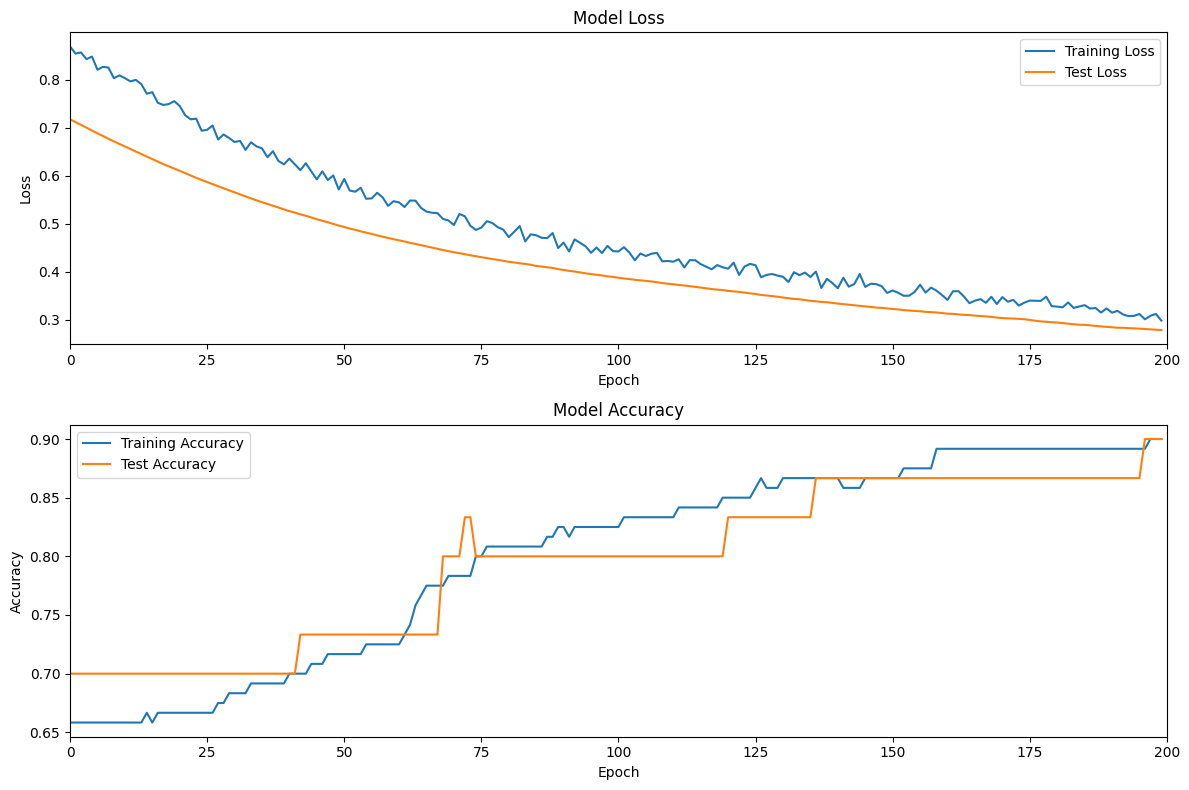

In [67]:
plt.figure(figsize=(12, 8))

# Plot loss
plt.subplot(2, 1, 1)
plt.plot(train_history['loss'], label='Training Loss')
plt.plot(test_history['loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, len(train_history['loss']))  # Устанавливаем правильный диапазон эпох
plt.legend()

# Plot accuracy
plt.subplot(2, 1, 2)
plt.plot(train_history['accuracy'], label='Training Accuracy')
plt.plot(test_history['accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim(0, len(train_history['accuracy']))  # Устанавливаем правильный диапазон эпох
plt.legend()

plt.tight_layout()
plt.show()

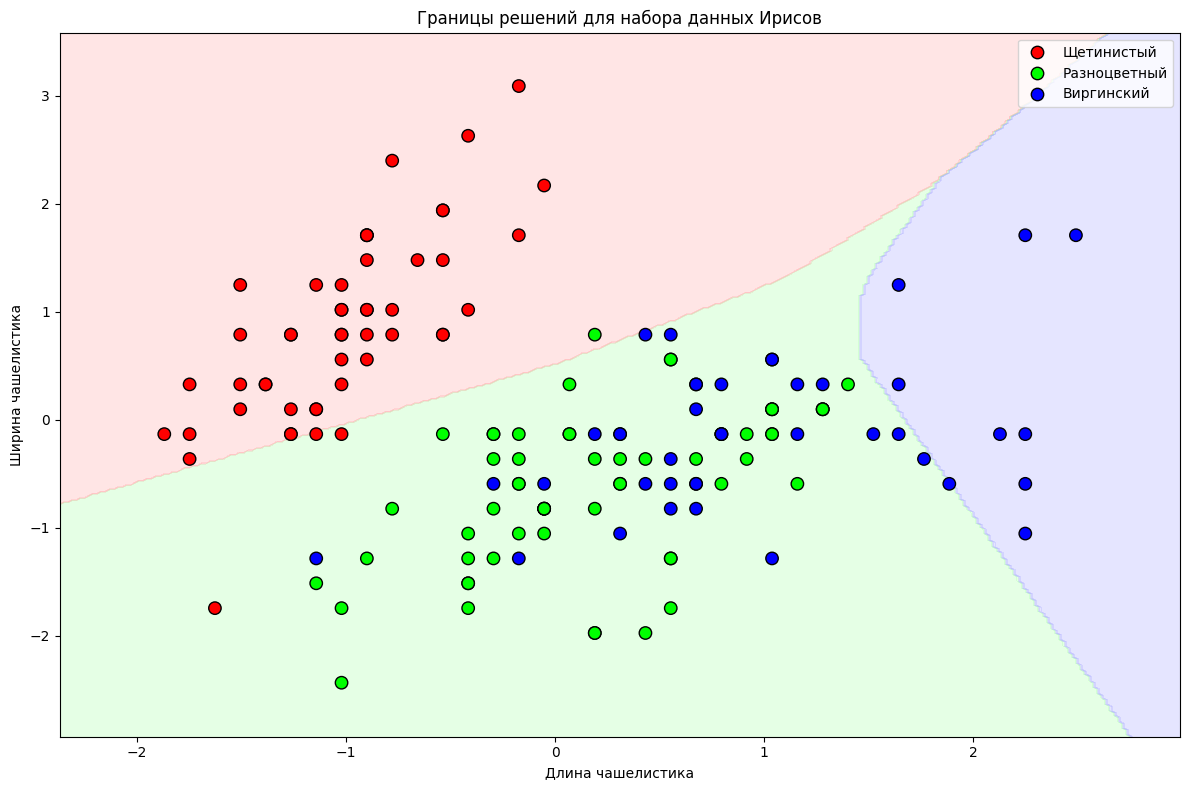

In [68]:
feature_idx = [0, 1]  # Первые два признака
feature_names = ['Длина чашелистика', 'Ширина чашелистика']

# Создание сетки для визуализации границы решений
def plot_decision_boundary(model, X, y, feature_idx=[0, 1], feature_names=None, resolution=0.02):
    # Извлечение двух выбранных признаков
    X_selected = X[:, feature_idx]
    
    # Настройка графика
    plt.figure(figsize=(12, 8))
    
    # Определение цветовых карт для точек и областей решений
    cmap_dots = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    cmap_regions = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    
    # Установка минимальных и максимальных значений с отступом
    x_min, x_max = X_selected[:, 0].min() - 0.5, X_selected[:, 0].max() + 0.5
    y_min, y_max = X_selected[:, 1].min() - 0.5, X_selected[:, 1].max() + 0.5
    
    # Создание сетки
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Создание входных данных для модели (используя нули для невизуализированных признаков)
    mesh_input = np.zeros((xx.ravel().shape[0], X.shape[1]))
    mesh_input[:, feature_idx[0]] = xx.ravel()
    mesh_input[:, feature_idx[1]] = yy.ravel()
    
    # Предсказание меток классов для всех точек сетки
    Z = model.forward(mesh_input)
    Z = np.argmax(Z, axis=1)
    
    # Преобразование предсказаний в соответствии с сеткой
    Z = Z.reshape(xx.shape)
    
    # Построение границы решений
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_regions)
    
    # Построение точек обучающей выборки
    plt.scatter(X_selected[:, 0], X_selected[:, 1], c=np.argmax(y, axis=1), 
                cmap=cmap_dots, edgecolors='k', s=80)
    
    # Установка подписей и заголовка
    plt.xlabel(feature_names[0] if feature_names else f'Признак {feature_idx[0]}')
    plt.ylabel(feature_names[1] if feature_names else f'Признак {feature_idx[1]}')
    plt.title('Границы решений для набора данных Ирисов')
    
    # Добавление легенды
    class_names = ['Щетинистый', 'Разноцветный', 'Виргинский']
    for i, name in enumerate(class_names):
        plt.scatter([], [], c=list(cmap_dots.colors)[i], 
                   label=name, edgecolors='k', s=80)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Использование функции с обученной моделью
plot_decision_boundary(
    model=model,
    X=loader.data,
    y=loader.labels,
    feature_idx=feature_idx,
    feature_names=feature_names
)